# Activity 5: Extracting data from Twitter

Extract 100 tweets using tweepy library having hashtag '#brexit' and do the following <br>
i) Filter out the ones which are written in english <br>
ii) Calculate sentiment score for each of them using textblob library <br>
iii) Visualize these tweets using word cloud having at most 100 words <br>

In [3]:
#!pip install tweepy

Login to twitter <br>
Go to https://developer.twitter.com/en/apps <br>
Create an app <br>
Once app is created, Go to 'Keys and tokens' tab; copy consumer_key, consumer_secret, access_token, access_token_secret from there  <br>

In [1]:
consumer_key = 'your consumer key here'
consumer_secret = 'your consumer secret key here'
access_token = 'your access token here'
access_token_secret = 'your access token secret here'

In [2]:
import pandas as pd
import numpy as np
import pickle
import json
from pprint import pprint
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
import tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [4]:
tweet_list = []
cnt = 0
for tweet in tweepy.Cursor(api.search, q='#brexit', rpp=100).items():
    tweet_list.append(tweet)
    cnt = cnt + 1
    if cnt == 100:
        break

In [5]:
len(tweet_list)

100

In [6]:
tweet_list[0]

Status(_api=<tweepy.api.API object at 0x1a1ff23390>, _json={'created_at': 'Thu Mar 14 16:15:43 +0000 2019', 'id': 1106227418509926400, 'id_str': '1106227418509926400', 'text': 'RT @BBCWorld: Donald Trump: "I\'m surprised at how badly it\'s all gone," I gave Theresa May "ideas on how to negotiate... she didn\'t listen"…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'BBCWorld', 'name': 'BBC News (World)', 'id': 742143, 'id_str': '742143', 'indices': [3, 12]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 20911772, 'id_str': '20911772', 'name': 'Rogue23 🇺🇸', 'screen_name': 'NatashK', 'location': 'The Resistance is Everywhere', 'descrip

In [7]:
status = tweet_list[0]
json_str = json.dumps(status._json)
pprint(json.loads(json_str))

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Mar 14 16:15:43 +0000 2019',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 742143,
                                 'id_str': '742143',
                                 'indices': [3, 12],
                                 'name': 'BBC News (World)',
                                 'screen_name': 'BBCWorld'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1106227418509926400,
 'id_str': '1106227418509926400',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 161,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                      'coordinates': None,
   

In [8]:
json.loads(json_str)['text']

'RT @BBCWorld: Donald Trump: "I\'m surprised at how badly it\'s all gone," I gave Theresa May "ideas on how to negotiate... she didn\'t listen"…'

In [9]:
tweet_text = []
for i in range(0,len(tweet_list)):
    status = tweet_list[i]
    json_str = json.dumps(status._json)
    tweet_text.append(json.loads(json_str)['text'])

In [10]:
unique_tweet_text = list(set(tweet_text))

## Creating dataframe consists of texts of tweets

In [11]:
tweet_text_df = pd.DataFrame({'tweet_text' : unique_tweet_text})
tweet_text_df.head()

,tweet_text
0,I love this story: a UXB at Chris Grayling’s #...
1,RT @ASK_des: #Brexit Is there a bigger idiot a...
2,RT @timalmond: Leavers of Swindon event at 7pm...
3,RT @kevinbruns: Leavers just got LOL'ed by Par...
4,@skyellis666 @LBC @ShelaghFogarty Stating in t...


In [12]:
tweet_text_df['language_detected'] = tweet_text_df['tweet_text'].apply(lambda x : \
                                                                       str(TextBlob('u'+str(x)).detect_language()))

In [13]:
tweet_text_df.head(20)

,tweet_text,language_detected
0,I love this story: a UXB at Chris Grayling’s #...,en
1,RT @ASK_des: #Brexit Is there a bigger idiot a...,en
2,RT @timalmond: Leavers of Swindon event at 7pm...,en
3,RT @kevinbruns: Leavers just got LOL'ed by Par...,en
4,@skyellis666 @LBC @ShelaghFogarty Stating in t...,en
5,"La date de #Brexit est pour le 29 mars 2019, j...",fr
6,RT @edrormba: Donald #Trump blasts #May over #...,en
7,RT @Ettore_Rosato: Francia e Germania hanno mi...,it
8,RT @Dan_Wilberforce: What would you like to se...,en
9,RT @Esther_de_Lange: Watch @Nigel_Farage leave...,en


## Filter out the english tweets

In [14]:
tweet_text_df[tweet_text_df['language_detected']!='en']

,tweet_text,language_detected
5,"La date de #Brexit est pour le 29 mars 2019, j...",fr
7,RT @Ettore_Rosato: Francia e Germania hanno mi...,it
13,RT @Kommerskoll: Svårare för företag att långs...,sv
16,RT @britishbullybee: #BrexitBetrayal #BrexitDe...,de
17,#Opinión Telegrama para Michel Barnier de part...,gl
18,Meerderheid van de Britten heeft zich uitgespr...,nl
28,RT @_cT_s: Habe eben durch Zufall das beste GI...,de
33,#OPINIÓN La estrategia de @Theresa_May sobre e...,es
35,"RT @XXMonde: #Brexit : ""Il est possible que le...",fr
47,RT @JeanMessiha: Les caciques de l’ancien mond...,fr


In [15]:
tweet_text_df_eng = tweet_text_df[tweet_text_df['language_detected']=='en']
tweet_text_df_eng.shape

(69, 2)

## Extract sentiment scores of the english tweets using textblob

In [16]:
tweet_text_df_eng['sentiment_score'] = tweet_text_df_eng['tweet_text'].apply(lambda x: str(TextBlob('u'+str(x)).sentiment.polarity))
pd.set_option('display.max_colwidth', -1)
tweet_text_df_eng[['tweet_text', 'sentiment_score']].head(20)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tweet_text,sentiment_score
0,I love this story: a UXB at Chris Grayling’s #Brexit car park https://t.co/MpIzOgbHBL,0.5
1,RT @ASK_des: #Brexit Is there a bigger idiot anywhere in 🇬🇧 than Steve look at me Bray. Spends all his time outside Parliament talking nons…,-0.26666666666666666
2,RT @timalmond: Leavers of Swindon event at 7pm in Sir Daniel Arms. Contact me for more details. Pass it on.\n\n#Swindon #Brexit\n\n@Lugey6,0.5
3,RT @kevinbruns: Leavers just got LOL'ed by Parliament. \n\n#Brexit #ChangePolitics #ROAR #IndividualFirst,0.8
4,"@skyellis666 @LBC @ShelaghFogarty Stating in the EU is not free, but compared to the billions spaffed up the wall w… https://t.co/KVFMl6VBHf",-0.2
6,RT @edrormba: Donald #Trump blasts #May over #Brexit saying she 'didn't listen' to him when he told her to sue EU https://t.co/lf4yYJWgGK,0.0
8,RT @Dan_Wilberforce: What would you like to see? #brexit #nodeal #BackStop,0.0
9,RT @Esther_de_Lange: Watch @Nigel_Farage leave another #Brexit debate after he himself spoke (and recorded his YouTube video). This so-call…,0.0
10,"RT @BBCPolitics: Young people face ""being wheeled in to the operating theatre for major social and economic surgery"" based on a ""consent fo…",0.09895833333333334
11,"RT @Digitalnun: Praying for all tweeps, for an end to the #Brexit chaos, and for the comforting of the families of the children killed in t…",-0.2


## Creating word cloud

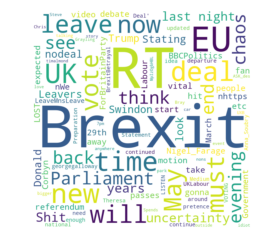

In [17]:
other_stopwords_to_remove = ['https', 'amp','co']
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)

text=tweet_text_df_eng["tweet_text"]
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=100,
                stopwords = stopwords, 
                min_font_size = 10).generate(str(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()